<a href="https://colab.research.google.com/github/rayeeed/regression/blob/main/regression_streamlined_GSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [ ]:
Df = pd.read_excel('/content/gsv_new.xlsx', index_col='site_name')
Df.drop(['Site_ID','Site_type','latitude','longitude'],inplace=True, axis=1)
y= Df.PNC
X=Df.drop(['PNC'], axis=1)

I found StandardScaler sufficient for all types of regression. Feel free to experiment and try out other types of standardizer!

In [ ]:
trans = StandardScaler()
X_st = trans.fit_transform(X)

In [ ]:
X_st = pd.DataFrame(X_st, columns = X.columns)

In [ ]:
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.7 MB/s eta 0:00:00


# **Linear Regression**

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,7):
  lst1=[]  
  LR = LinearRegression().fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 103.615s


r2 score for train data in LR: 0.272523498378188
cross validation r2 score:
0.19414417226889003
r2 score for train data in LR: 0.36789125922662735
cross validation r2 score:
0.29608201762270314
r2 score for train data in LR: 0.42803650189839315
cross validation r2 score:
0.3353925856276463
r2 score for train data in LR: 0.4484454119100124
cross validation r2 score:
0.3488023619843298
r2 score for train data in LR: 0.4518854790960104
cross validation r2 score:
0.3172269925052046


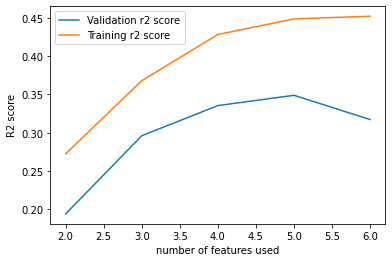

In [ ]:
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model = LinearRegression()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_road_p150', 'gsv_plant_p750'],
 ['gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_grass_p100', 'gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_grass_p100',
  'gsv_road_p150',
  'gsv_trade_p150',
  'gsv_awning_p250',
  'gsv_plant_p750'],
 ['gsv_grass_p100',
  'gsv_road_p150',
  'gsv_trade_p150',
  'gsv_awning_p250',
  'gsv_plant_p750',
  'gsv_sidewalk_p1500']]

# **Ridge Regression**

I will use the best features from linear regression to find out the optimum model parameters of ridge regression. It will go as follows:


1.   for the ridge model, we will find the optimum number of features using sequential feature selector (Next two cells)
2. use optuna to pin point the optimum hyperparameter values.(alpha, tol, interscept, solver)
3. Another round of feature selection and hyperparameter optimization


In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,6):
  lst1=[]  
  Rd = RidgeCV(alphas=np.logspace(-6.4, 6.4, num=10)).fit(X_st, y)
  importance = np.abs(Rd.coef_)
  feature_names = np.array(X.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
      Rd, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 104.341s


r2 score for train data in LR: 0.27250878278730106
cross validation r2 score:
0.16108076073086386
r2 score for train data in LR: 0.3584150887508136
cross validation r2 score:
0.26350623920636285
r2 score for train data in LR: 0.39515050005252417
cross validation r2 score:
0.2877757632887593
r2 score for train data in LR: 0.41042103921832784
cross validation r2 score:
0.30455029367166875


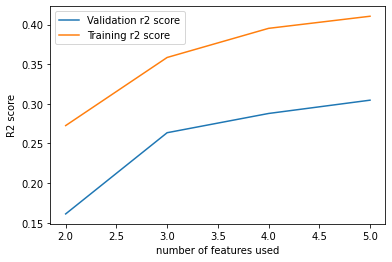

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=RidgeCV(alphas=np.logspace(-6.4, 6.4, num=10))
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_road_p150', 'gsv_plant_p750'],
 ['gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_road_p150', 'gsv_trade_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_road_p150',
  'gsv_trade_p150',
  'gsv_awning_p250',
  'gsv_plant_p750',
  'gsv_sidewalk_p1250']]

In [ ]:
X_train= X_st[lst2[1]] 
def objective(trial):
    alpha = trial.suggest_float("alpha", -7, 10)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    tol = trial.suggest_float("tol", 0.001, 0.01, log=True)
    solver = trial.suggest_categorical("solver", ["auto", "svd","cholesky", "lsqr", "saga", "sag"])

    ## Create Model
    regressor = Ridge(alpha=alpha,fit_intercept=intercept,tol=tol,solver=solver)
    
    predicted= cross_val_predict(regressor, X_train, y,
                            cv=10)
    return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(study_name="RidgeRegression",direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-01-24 07:35:38,847] A new study created in memory with name: RidgeRegression
[I 2023-01-24 07:35:38,905] Trial 0 finished with value: 0.2801084184735979 and parameters: {'alpha': 4.714003343951145, 'fit_intercept': True, 'tol': 0.0015055011000425658, 'solver': 'sag'}. Best is trial 0 with value: 0.2801084184735979.
[I 2023-01-24 07:35:38,945] Trial 1 finished with value: 0.264466878767712 and parameters: {'alpha': 7.67618385864847, 'fit_intercept': True, 'tol': 0.0012138603352324666, 'solver': 'svd'}. Best is trial 0 with value: 0.2801084184735979.
[I 2023-01-24 07:35:38,985] Trial 2 finished with value: -9.938462406640237 and parameters: {'alpha': -5.082753973229269, 'fit_intercept': False, 'tol': 0.002139942726992955, 'solver': 'cholesky'}. Best is trial 0 with value: 0.2801084184735979.
[I 2023-01-24 07:35:39,028] Trial 3 finished with value: -8.124396308254092 and parameters: {'alpha': 9.021861402495077, 'fit_intercept': False, 'tol': 0.004948597707519876, 'solver': 'auto'}

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = Ridge(alpha=best_params['alpha'],
              fit_intercept=best_params['fit_intercept'],
              tol=best_params['tol'],
              solver= best_params['solver'])
model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params : {'alpha': 0.18607083537233282, 'fit_intercept': True, 'tol': 0.005956139558996038, 'solver': 'sag'}

Best r2 : 0.2990623979093887
r2 score for train data in LR: 0.36786848893763746
cross validation r2 score: 0.2973725099895913


In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,7):
  lst1=[]
  model = Ridge(alpha=best_params['alpha'],
              fit_intercept=best_params['fit_intercept'],
              tol=best_params['tol'],
              solver= best_params['solver'])  
  Rd = model.fit(X_st, y)
  importance = np.abs(Rd.coef_)
  feature_names = np.array(X.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
      Rd, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 103.935s


In [ ]:
lst2

[['gsv_road_p150', 'gsv_plant_p750'],
 ['gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_grass_p100', 'gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_road_p150',
  'gsv_awning_p250',
  'gsv_plant_p750'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_road_p150',
  'gsv_awning_p250',
  'gsv_trade_p250',
  'gsv_plant_p750']]

r2 score for train data in LR: 0.27233897710541277
cross validation r2 score:
0.1961119952878324
r2 score for train data in LR: 0.36786726606127074
cross validation r2 score:
0.29640557475304175
r2 score for train data in LR: 0.42797865521424083
cross validation r2 score:
0.3340174725316959
r2 score for train data in LR: 0.4478547620964787
cross validation r2 score:
0.3371013682614121
r2 score for train data in LR: 0.4766696664408542
cross validation r2 score:
0.3339203436034244


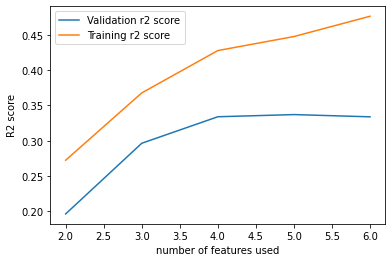

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model = Ridge(alpha=best_params['alpha'],
              fit_intercept=best_params['fit_intercept'],
              tol=best_params['tol'],
              solver= best_params['solver'])  
  model.fit(X_Train, y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

SFS produces the same features so we dont proceed further.

# **Support Vector regression**

I will use the best features from ridge regression to find out the optimum model parameters of support vector regression. It will go as follows:


1.   use the best features of ridge Regression to estimate the best hyperparameters of ridge regression.
2.   for this model, we will find the optimum number of features using sequential feature selector.
3.   for optimum feature set we will make a rough estimate of hyperparameters using grid-search.
4. Make another round of feature selection and evaluate the model.
5. use optuna to pin point the optimum hyperparameter values.

This process becomes repetitive but in some cases I have achieved higher CV r2. You can skip 3 and 4 if you want, should not be very huge difference.  



In [ ]:
from sklearn.model_selection import GridSearchCV
most_relevant_features=lst2[1]
train_x=X_st[most_relevant_features]  
# defining parameter range
param_grid = {'C': [1000, 17500, 13000, 145000, 18000, 20000, 25000, 27500, 30000], #C and Gamma are selected after multiple trial, when they are setting for nor the highest or lowest values of the sets
              'gamma': [3, 2, 0.1, 1, 5, 0.005, 4, .001, .0001],
              'kernel': ['rbf','linear']} 
  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_x, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END ......C=1000, gamma=3, kernel=rbf;, score=-1.153 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=3, kernel=rbf;, score=-0.706 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=3, kernel=rbf;, score=-0.487 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=3, kernel=rbf;, score=0.024 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=3, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=3, kernel=linear;, score=-0.080 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=3, kernel=linear;, score=0.144 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=3, kernel=linear;, score=0.108 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=3, kernel=linear;, score=0.104 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=3, kernel=linear;, score=-0.188 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=2, kernel=rbf;, score=-1.144 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=2, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 17500, 13000, 145000, 18000, 20000, 25000,
                               27500, 30000],
                         'gamma': [3, 2, 0.1, 1, 5, 0.005, 4, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 17500, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=17500, gamma=0.1)


In [ ]:
model= grid.best_estimator_
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,7):
  lst1=[]  
  SV = model.fit(X_st, y)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(SV, n_features_to_select=x, direction="forward",cv=10).fit(X_st, y)
  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 100.653s


r2 score for train data in LR: 0.340948026613333
cross validation r2 score:
0.26990024711142035
r2 score for train data in LR: 0.3933525562662741
cross validation r2 score:
0.3169282559259714
r2 score for train data in LR: 0.4600486625348842
cross validation r2 score:
0.37083491941123514
r2 score for train data in LR: 0.5510129605654632
cross validation r2 score:
0.39850188547048704
r2 score for train data in LR: 0.6734853345343856
cross validation r2 score:
0.4816630876601373


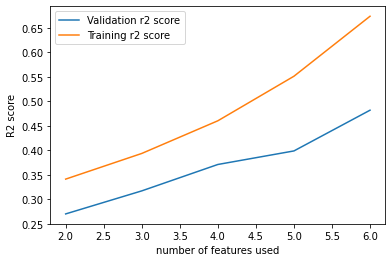

In [ ]:
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_road_p150', 'gsv_plant_p750'],
 ['gsv_road_p150', 'gsv_plant_p750', 'gsv_van_p1500'],
 ['gsv_road_p150', 'gsv_truck_p500', 'gsv_plant_p750', 'gsv_van_p1500'],
 ['gsv_earth_p100',
  'gsv_road_p150',
  'gsv_truck_p500',
  'gsv_plant_p750',
  'gsv_van_p1500'],
 ['gsv_earth_p100',
  'gsv_car_p100',
  'gsv_road_p150',
  'gsv_truck_p500',
  'gsv_plant_p750',
  'gsv_van_p1500']]

In [ ]:
most_relevant_features=lst2[3]
train_x=X_st[most_relevant_features]  
# defining parameter range
param_grid = {'C': [4000, 50000, 60000, 55000, 65000, 70000, 25000, 27500, 30000], #C and Gamma are selected after multiple trial, when they are setting for nor the highest or lowest values of the sets
              'gamma': [3, 2, 0.1, 1, 5, 0.005, 4, .001, .0001],
              'kernel': ['rbf','linear']} 
  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_x, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END ......C=4000, gamma=3, kernel=rbf;, score=-1.327 total time=   0.0s
[CV 2/5] END ......C=4000, gamma=3, kernel=rbf;, score=-0.819 total time=   0.0s
[CV 3/5] END ......C=4000, gamma=3, kernel=rbf;, score=-0.401 total time=   0.0s
[CV 4/5] END .......C=4000, gamma=3, kernel=rbf;, score=0.035 total time=   0.0s
[CV 5/5] END .......C=4000, gamma=3, kernel=rbf;, score=0.006 total time=   0.0s
[CV 1/5] END ...C=4000, gamma=3, kernel=linear;, score=-1.056 total time=   0.0s
[CV 2/5] END ...C=4000, gamma=3, kernel=linear;, score=-0.305 total time=   0.0s
[CV 3/5] END ...C=4000, gamma=3, kernel=linear;, score=-0.084 total time=   0.0s
[CV 4/5] END ....C=4000, gamma=3, kernel=linear;, score=0.513 total time=   0.0s
[CV 5/5] END ...C=4000, gamma=3, kernel=linear;, score=-1.295 total time=   0.0s
[CV 1/5] END ......C=4000, gamma=2, kernel=rbf;, score=-1.486 total time=   0.0s
[CV 2/5] END ......C=4000, gamma=2, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [4000, 50000, 60000, 55000, 65000, 70000, 25000,
                               27500, 30000],
                         'gamma': [3, 2, 0.1, 1, 5, 0.005, 4, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 50000, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=50000, gamma=0.1)


In [ ]:
model= grid.best_estimator_
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,7):
  lst1=[]  
  SV = model.fit(X_st, y)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(SV, n_features_to_select=x, direction="forward",cv=10).fit(X_st, y)
  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 102.688s


r2 score for train data in LR: 0.25302259609023003
cross validation r2 score:
0.2106281108301863
r2 score for train data in LR: 0.5647569071651779
cross validation r2 score:
0.45499039298847865
r2 score for train data in LR: 0.6029976491350592
cross validation r2 score:
0.48245031129093385
r2 score for train data in LR: 0.7697485903345042
cross validation r2 score:
0.6067366869331969
r2 score for train data in LR: 0.8311951081894849
cross validation r2 score:
0.6207295057656207


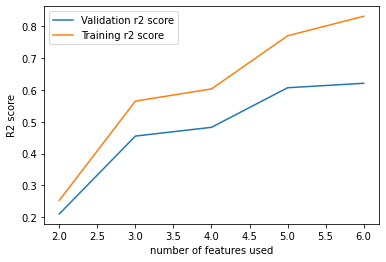

In [ ]:
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_signboard_p250', 'gsv_poster_p750'],
 ['gsv_pole_p150', 'gsv_signboard_p250', 'gsv_poster_p750'],
 ['gsv_pole_p150', 'gsv_signboard_p250', 'gsv_field_p500', 'gsv_poster_p750'],
 ['gsv_earth_p50',
  'gsv_pole_p150',
  'gsv_signboard_p250',
  'gsv_field_p500',
  'gsv_poster_p750'],
 ['gsv_earth_p50',
  'gsv_pole_p150',
  'gsv_signboard_p250',
  'gsv_field_p500',
  'gsv_road_p500',
  'gsv_poster_p750']]

In [ ]:
most_relevant_features= lst2[3]

X_train= X_st[most_relevant_features]

In [ ]:
def objective(trial):
    C = int(trial.suggest_int("C", 1, 1000000))
    kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 10000, log=True)

    ## Create Model
    regressor = SVR(C=C,kernel=kernel,gamma=gamma)
    
    predicted= cross_val_predict(regressor, X_train, y,
                            cv=10)
    return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(study_name="SupportVectorRegression",direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2023-01-24 08:09:19,027] A new study created in memory with name: SupportVectorRegression
[I 2023-01-24 08:09:19,151] Trial 0 finished with value: 0.3660265905780432 and parameters: {'C': 718248, 'kernel': 'rbf', 'gamma': 0.37438419326845446}. Best is trial 0 with value: 0.3660265905780432.
[I 2023-01-24 08:09:19,230] Trial 1 finished with value: -0.08401308639880845 and parameters: {'C': 400857, 'kernel': 'rbf', 'gamma': 1169.7813822044616}. Best is trial 0 with value: 0.3660265905780432.
[I 2023-01-24 08:09:19,326] Trial 2 finished with value: -0.5736871859626751 and parameters: {'C': 124390, 'kernel': 'linear', 'gamma': 1.9608443137601907}. Best is trial 0 with value: 0.3660265905780432.
[I 2023-01-24 08:09:19,439] Trial 3 finished with value: -0.5952397852773172 and parameters: {'C': 256368, 'kernel': 'linear', 'gamma': 132.61793483049192}. Best is trial 0 with value: 0.3660265905780432.
[I 2023-01-24 08:09:19,561] Trial 4 finished with value: -0.08401308639880845 and parameters

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

Best Params : {'C': 100979, 'kernel': 'rbf', 'gamma': 0.16454716324429514}

Best r2 : 0.6445123052301787


In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
model = SVR(C=best_params['C'],
              kernel=best_params['kernel'],
              gamma=best_params['gamma'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

r2 score for train data in LR: 0.8716490087138551
cross validation r2 score: 0.6445123052301787


Try with lesser features

In [ ]:
most_relevant_features= lst2[2]

X_train= X_st[most_relevant_features]

In [ ]:
def objective(trial):
    C = int(trial.suggest_int("C", 1, 500000))
    kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 1000, log=True)

    ## Create Model
    regressor = SVR(C=C,kernel=kernel,gamma=gamma)
    
    predicted= cross_val_predict(regressor, X_train, y,
                            cv=10)
    return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(study_name="SupportVectorRegression",direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-01-24 08:13:05,044] A new study created in memory with name: SupportVectorRegression
[I 2023-01-24 08:13:05,171] Trial 0 finished with value: 0.2988048204097976 and parameters: {'C': 496128, 'kernel': 'rbf', 'gamma': 0.050489565963351773}. Best is trial 0 with value: 0.2988048204097976.
[I 2023-01-24 08:13:05,262] Trial 1 finished with value: 0.2731169405662931 and parameters: {'C': 292525, 'kernel': 'linear', 'gamma': 17.553679024326172}. Best is trial 0 with value: 0.2988048204097976.
[I 2023-01-24 08:13:05,331] Trial 2 finished with value: 0.2594906222273733 and parameters: {'C': 451126, 'kernel': 'rbf', 'gamma': 0.00620750778857875}. Best is trial 0 with value: 0.2988048204097976.
[I 2023-01-24 08:13:05,432] Trial 3 finished with value: 0.27311692497291973 and parameters: {'C': 388389, 'kernel': 'linear', 'gamma': 26.7724590432699}. Best is trial 0 with value: 0.2988048204097976.
[I 2023-01-24 08:13:05,515] Trial 4 finished with value: 0.27311698678927954 and parameters: {'

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = SVR(C=best_params['C'],
              kernel=best_params['kernel'],
              gamma=best_params['gamma'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params : {'C': 44887, 'kernel': 'rbf', 'gamma': 0.08289583185664076}

Best r2 : 0.4929600668381994
r2 score for train data in LR: 0.5832589961970569
cross validation r2 score: 0.4929600668381994


# **XGBoost**

For XGBoost I will run couple of round of feature selection and optuna tuning. Here I always use gblinear booster, because the tree and dart boosters tend to overfit and make unreliable predictions (changing seed number drastically drops r2 cross val score)

In [ ]:
most_relevant_features= lst2[3] #taking the previous features

X_Train= X_st[most_relevant_features]

In [ ]:
def objective(trial):

      gamma = trial.suggest_float('gamma', 0, 20) 
      learning_rate= trial.suggest_float('learning_rate', .005, 2)
      max_depth = int(trial.suggest_int('max_depth', 50, 500)) 
      min_child_weight= int(trial.suggest_int('min_child_weight', 0, 100)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 4000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 5)
      subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                         max_depth=max_depth,
                         gamma=gamma,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                         subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      predicted= cross_val_predict(XGB, X_Train, y,
                            cv=10)
      return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-01-24 08:22:08,188] A new study created in memory with name: no-name-48494182-f438-4362-9dab-13b530a9262f
[I 2023-01-24 08:22:08,931] Trial 0 finished with value: 0.06919447405771395 and parameters: {'gamma': 11.44288736915521, 'learning_rate': 1.446447594521033, 'max_depth': 355, 'min_child_weight': 14, 'n_estimators': 3281, 'reg_alpha': 98.65508681759492, 'reg_lambda': 1.2044506315077774, 'subsample': 0.631656153459428}. Best is trial 0 with value: 0.06919447405771395.
[I 2023-01-24 08:22:09,164] Trial 1 finished with value: 0.05241210758481729 and parameters: {'gamma': 6.873749444747991, 'learning_rate': 1.436830330159792, 'max_depth': 69, 'min_child_weight': 42, 'n_estimators': 860, 'reg_alpha': 91.76859397633665, 'reg_lambda': 1.5973220448308283, 'subsample': 0.6356501804245599}. Best is trial 0 with value: 0.06919447405771395.
[I 2023-01-24 08:22:09,464] Trial 2 finished with value: 0.05015259411744333 and parameters: {'gamma': 8.532994245921508, 'learning_rate': 0.317051

It seems the features that worked for SVR doesnt work for XGBoost. So lets try from scratch again.

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(3,7):
  lst1=[]  
  Rd = XGBRegressor(booster='gblinear',objective= "reg:squarederror").fit(X_st, y)
  feature_names = np.array(X.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
      Rd, n_features_to_select=x, direction="forward",cv=10).fit(X_st, y)
  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Done in 432.768s


In [ ]:
lst2

[['gsv_car_p50', 'gsv_signboard_p250', 'gsv_plant_p750'],
 ['gsv_car_p50', 'gsv_signboard_p250', 'gsv_plant_p750', 'gsv_truck_p750'],
 ['gsv_car_p50',
  'gsv_signboard_p250',
  'gsv_plant_p750',
  'gsv_truck_p750',
  'gsv_grass_p3000'],
 ['gsv_car_p50',
  'gsv_road_p100',
  'gsv_signboard_p250',
  'gsv_plant_p750',
  'gsv_truck_p750',
  'gsv_grass_p3000']]

r2 score for train data in LR: 0.3501590851723797
cross validation r2 score:
0.27036670744333435
r2 score for train data in LR: 0.3995672808574978
cross validation r2 score:
0.32226890064656166
r2 score for train data in LR: 0.42246755932518587
cross validation r2 score:
0.33283535061175407
r2 score for train data in LR: 0.4347962798655508
cross validation r2 score:
0.3410858362753105


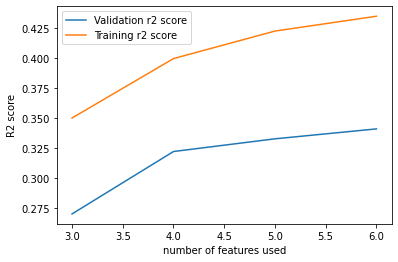

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',objective= "reg:squarederror" )
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
rel_f_st=  lst2[1]

X_Train=X_st[rel_f_st]

In [ ]:
def objective(trial):

      gamma = trial.suggest_float('gamma', 0, 20) 
      learning_rate= trial.suggest_float('learning_rate', .005, 2)
      max_depth = int(trial.suggest_int('max_depth', 50, 500)) 
      min_child_weight= int(trial.suggest_int('min_child_weight', 0, 100)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 4000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 50)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                         max_depth=max_depth,
                         gamma=gamma,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                         subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      predicted= cross_val_predict(XGB, X_Train, y,
                            cv=10)
      return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-01-24 08:38:13,685] A new study created in memory with name: no-name-df58d180-3795-4029-a8e8-ba97dc3f8ada
[I 2023-01-24 08:38:14,229] Trial 0 finished with value: 0.22084326107566965 and parameters: {'gamma': 6.645384675999109, 'learning_rate': 1.769779672736878, 'max_depth': 382, 'min_child_weight': 77, 'n_estimators': 1555, 'reg_alpha': 2.637218036921318, 'reg_lambda': 1.926631766447124, 'subsample': 0.9107148153853093}. Best is trial 0 with value: 0.22084326107566965.
[I 2023-01-24 08:38:14,929] Trial 1 finished with value: 0.24711555479230007 and parameters: {'gamma': 14.15547603892708, 'learning_rate': 1.4116444113052709, 'max_depth': 398, 'min_child_weight': 9, 'n_estimators': 2092, 'reg_alpha': 36.52912863027501, 'reg_lambda': 1.6113639319455373, 'subsample': 0.9755705522791169}. Best is trial 1 with value: 0.24711555479230007.
[I 2023-01-24 08:38:15,328] Trial 2 finished with value: 0.2710736193026684 and parameters: {'gamma': 4.920264900675521, 'learning_rate': 1.04366

In [ ]:
trial = study.best_trial
print('r2: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

r2: 0.460666707989149
Best hyperparameters: {'gamma': 1.6275710873906901, 'learning_rate': 0.2682003919137322, 'max_depth': 471, 'min_child_weight': 56, 'n_estimators': 3297, 'reg_alpha': 1.2522333925192335, 'reg_lambda': 0.2325300759435701, 'subsample': 0.7839294575969872}


In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
model = XGBRegressor(booster='gblinear',
                     gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     max_depth=best_params['max_depth'],
                     min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

r2 score for train data in LR: 0.5359638822039957
cross validation r2 score: 0.460666707989149


In [ ]:
model = XGBRegressor(booster='gblinear',
                     gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     max_depth=best_params['max_depth'],
                     min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(5,7):
  lst1=[]  
  feature_names = np.array(X.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(model, n_features_to_select=x, direction="forward",cv=10).fit(X_st, y)
  print(f"feature selected: {x}")

  

  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()

  
  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()  
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

feature selected: 5
feature selected: 6
Done in 2078.835s


In [ ]:
# lst2 =[['gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
#  ['gsv_signboard_p50', 'gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750']]
lst2

[['gsv_signboard_p50',
  'gsv_building_p100',
  'gsv_road_p150',
  'gsv_awning_p250',
  'gsv_plant_p750'],
 ['gsv_signboard_p50',
  'gsv_building_p100',
  'gsv_grass_p100',
  'gsv_road_p150',
  'gsv_awning_p250',
  'gsv_plant_p750']]

In [ ]:
lst2 = [
    ['gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
    ['gsv_signboard_p50', 'gsv_road_p150', 'gsv_awning_p250', 'gsv_plant_p750'],
    ['gsv_signboard_p50',
    'gsv_building_p100',
    'gsv_road_p150',
    'gsv_awning_p250',
    'gsv_plant_p750'],
  ['gsv_signboard_p50',
    'gsv_building_p100',
    'gsv_grass_p100',
    'gsv_road_p150',
    'gsv_awning_p250',
    'gsv_plant_p750']]

r2 score for train data in LR: 0.3472030119288865
cross validation r2 score:
0.26595614241068655
r2 score for train data in LR: 0.38469555982747705
cross validation r2 score:
0.3002795831601248
r2 score for train data in LR: 0.4029160934456234
cross validation r2 score:
0.29999266038876105
r2 score for train data in LR: 0.4656285891860996
cross validation r2 score:
0.32881837862849306


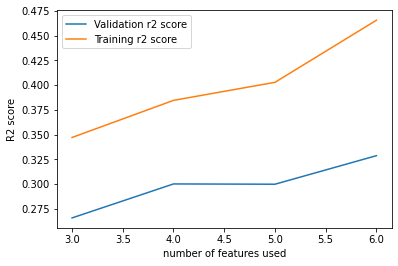

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model = XGBRegressor(booster='gblinear',
                      gamma=best_params['gamma'],
                      learning_rate=best_params['learning_rate'],
                      max_depth=best_params['max_depth'],
                      min_child_weight=best_params['min_child_weight'],
                      n_estimators=best_params['n_estimators'],
                      reg_alpha=best_params['reg_alpha'],
                      reg_lambda=best_params['reg_lambda'],
                      subsample=best_params['subsample'],
                      objective= "reg:squarederror",
                      seed=42)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')
  
  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)
  
  scores = r2_score(y, predicted)
                              

  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error') 
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
rel_f_st=  ['gsv_car_p50',
  #'gsv_road_p100',
  'gsv_signboard_p250',
  'gsv_plant_p750',
  'gsv_truck_p750',
  'gsv_grass_p3000']

X_Train=X_st[rel_f_st]

In [ ]:
def objective(trial):

      gamma = trial.suggest_float('gamma', 0, 20) 
      learning_rate= trial.suggest_float('learning_rate', .005, 2)
      max_depth = int(trial.suggest_int('max_depth', 50, 10000)) 
      min_child_weight= int(trial.suggest_int('min_child_weight', 0, 100)) 
      n_estimators = int(trial.suggest_int('n_estimators', 50, 5000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 50)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators, 
                         max_depth=max_depth,
                         gamma=gamma,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                         subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)
      
      predicted= cross_val_predict(XGB, X_Train, y,
                            cv=10)
      return r2_score(y, predicted)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-01-24 10:20:20,686] A new study created in memory with name: no-name-ff5c951c-6656-43e4-a071-f3c59d972ad6
[I 2023-01-24 10:20:21,501] Trial 0 finished with value: 0.16394855104779926 and parameters: {'gamma': 17.278530670564994, 'learning_rate': 1.453406623966592, 'max_depth': 7394, 'min_child_weight': 32, 'n_estimators': 4184, 'reg_alpha': 33.88416251077076, 'reg_lambda': 2.800763693602959, 'subsample': 0.8438455657927189}. Best is trial 0 with value: 0.16394855104779926.
[I 2023-01-24 10:20:21,754] Trial 1 finished with value: 0.44729573604157413 and parameters: {'gamma': 15.201411305968877, 'learning_rate': 0.6269969891574031, 'max_depth': 821, 'min_child_weight': 53, 'n_estimators': 948, 'reg_alpha': 15.749532308089778, 'reg_lambda': 0.45501014056295097, 'subsample': 0.7666413336694057}. Best is trial 1 with value: 0.44729573604157413.
[I 2023-01-24 10:20:22,508] Trial 2 finished with value: 0.16277310275988532 and parameters: {'gamma': 13.225615283357048, 'learning_rate': 

In [ ]:
trial = study.best_trial
print('r2: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

r2: 0.5101010456464907
Best hyperparameters: {'gamma': 11.766736220488811, 'learning_rate': 0.9020105701380695, 'max_depth': 8534, 'min_child_weight': 2, 'n_estimators': 3872, 'reg_alpha': 11.942716276288536, 'reg_lambda': 0.19138476076176392, 'subsample': 0.6119125783404159}


In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
model = XGBRegressor(booster='gblinear',
                     gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     max_depth=best_params['max_depth'],
                     min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y,
                              cv=10)  
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

r2 score for train data in LR: 0.5935692903841263
cross validation r2 score: 0.5101010456464907
